In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn import preprocessing


In [2]:
# load iris data set
iris = load_iris()
X = preprocessing.normalize(iris.data)

In [3]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

執行時間: 0.14637209999999978 s


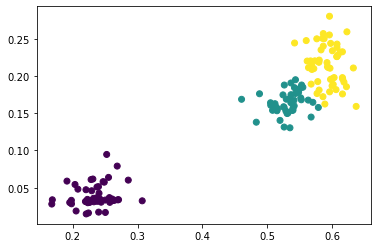

In [4]:
#Kmeans
t = time.perf_counter()
KM = KMeans(n_clusters=3,init='random',random_state=5)
KM.fit(X)
KM.predict(X)
plt.scatter(X[:,2],X[:,3],c=KM.predict(X))
t2 = time.perf_counter()

print("執行時間:", t2-t,"s")
print("Purity:", purity_score(iris.target, KM.predict(X)))

執行時間: 0.0010379999999998724 s


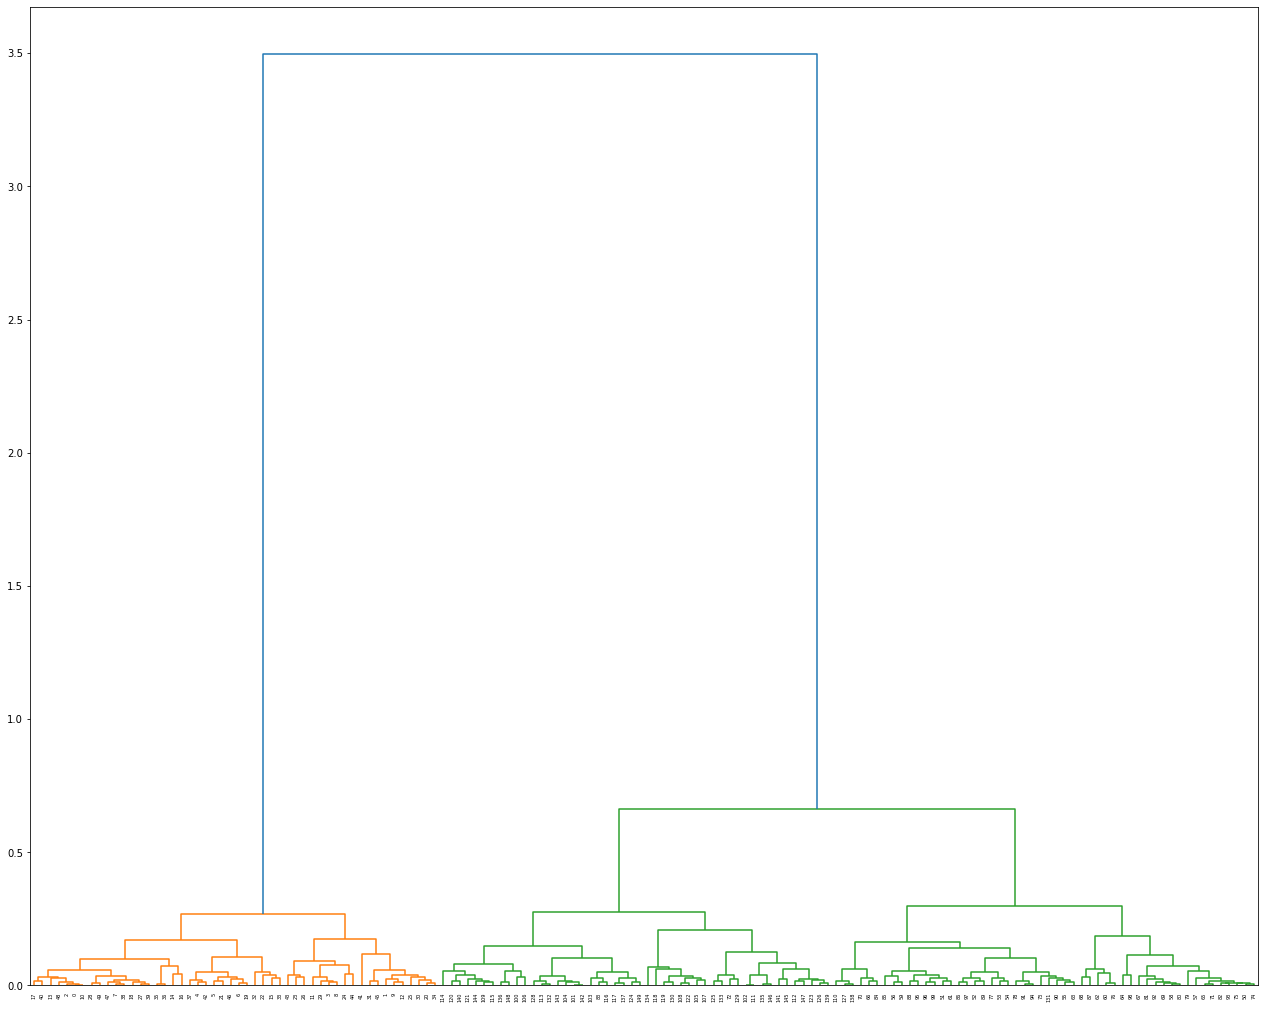

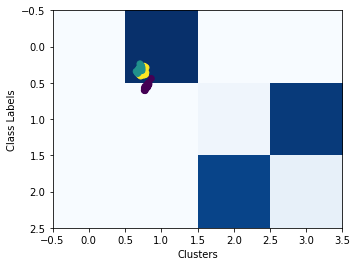

Purity: 0.96


In [5]:
# 階層式 ward
t = time.perf_counter()

linkage_type = 'ward'
linkage_matrix = linkage(X, linkage_type)

plt.figure(figsize=(22,18))
t2 = time.perf_counter()

print("執行時間:", t2-t,"s")
# plot using 'dendrogram()'
dendrogram(linkage_matrix)

plt.show()

k = 3
clusters = sch.fcluster(linkage_matrix,k,criterion='maxclust')

plt.scatter(X[:,0],X[:,1],c=clusters)

print("Purity:", purity_score(iris.target, clusters))

執行時間: 0.0015470999999998014 s


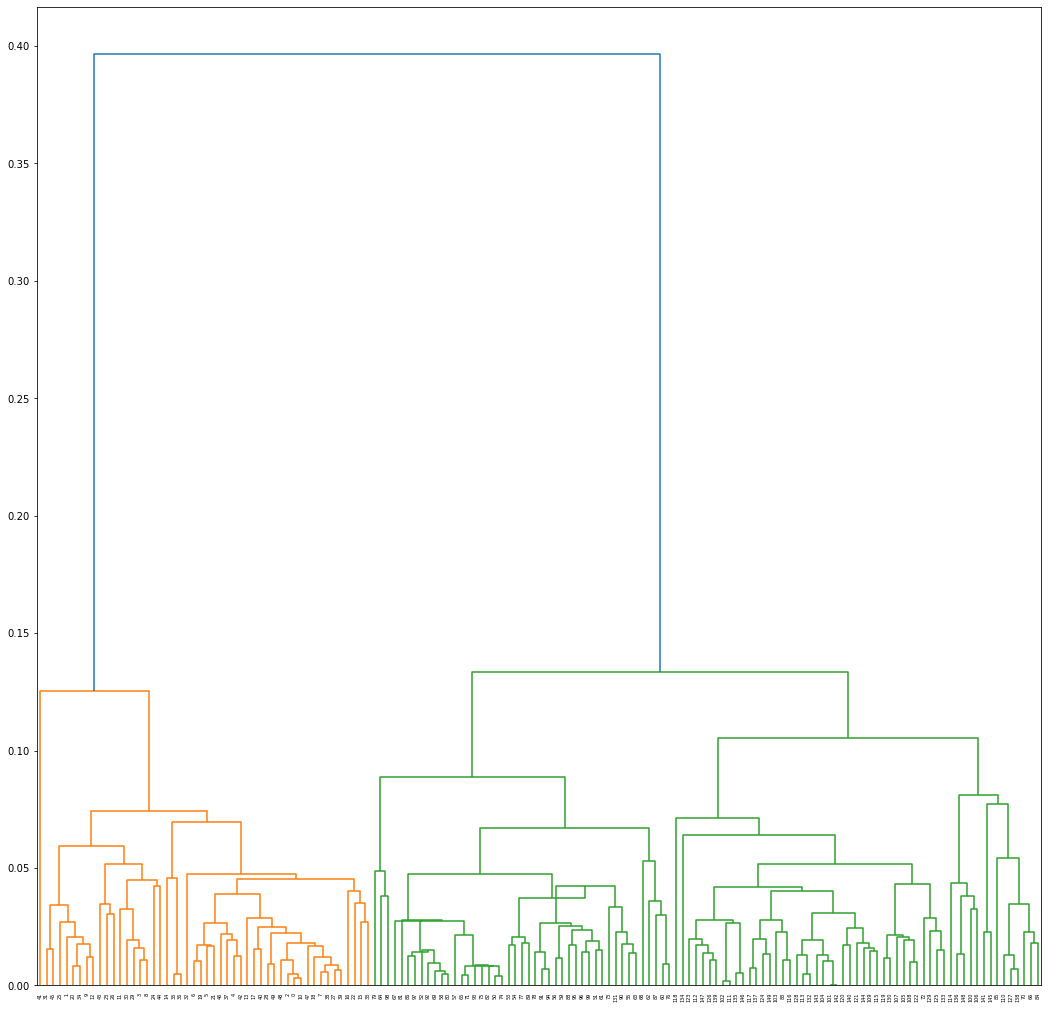

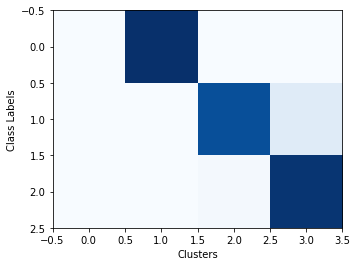

Purity: 0.9533333333333334


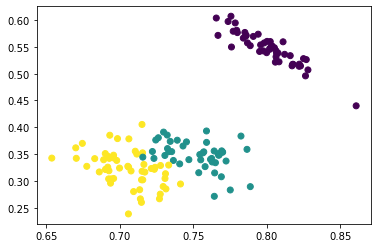

In [6]:
# 階層式 median type
t = time.perf_counter()

linkage_type = 'median'
linkage_matrix = linkage(X, linkage_type)

plt.figure(figsize=(18,18))
t2 = time.perf_counter()

print("執行時間:", t2-t,"s")
# plot using 'dendrogram()'
dendrogram(linkage_matrix)

plt.show()

k = 3
clusters = sch.fcluster(linkage_matrix,k,criterion='maxclust')

print("Purity:", purity_score(iris.target, clusters))
plt.scatter(X[:,0],X[:,1],c=clusters)

執行時間: 0.0010462000000002192 s


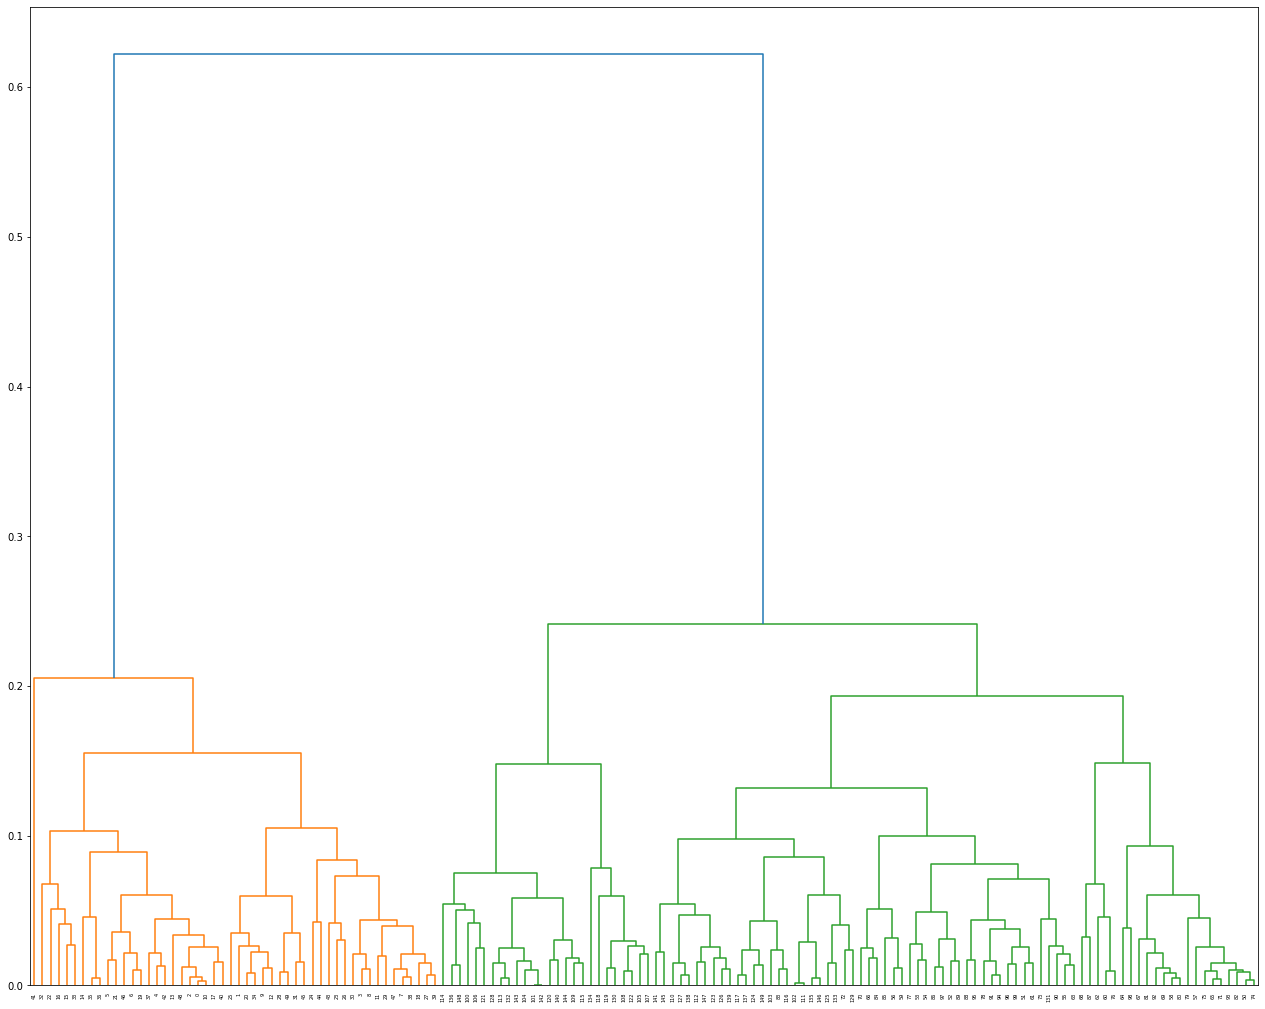

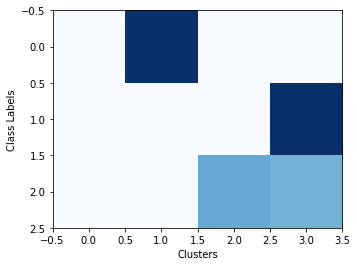

Purity: 0.84


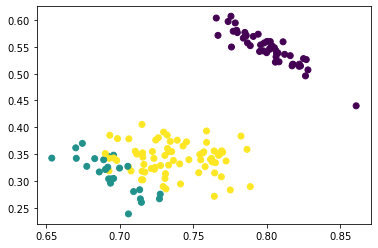

In [7]:
# 階層式 complete type
t = time.perf_counter()

linkage_type = 'complete'
linkage_matrix = linkage(X, linkage_type)

plt.figure(figsize=(22,18))
t2 = time.perf_counter()

print("執行時間:", t2-t,"s")
# plot using 'dendrogram()'
dendrogram(linkage_matrix)

plt.show()

k = 3
clusters = sch.fcluster(linkage_matrix,k,criterion='maxclust')

print("Purity:", purity_score(iris.target, clusters))
plt.scatter(X[:,0],X[:,1],c=clusters)

執行時間: 0.001302199999999587 s


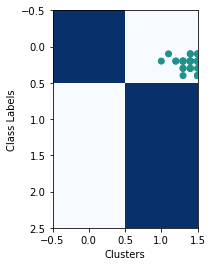

Purity: 0.6666666666666666


In [8]:
#DBSCAN
X = iris.data[:,2:4]
t = time.perf_counter()
clustering = DBSCAN(eps=0.3, min_samples=10).fit(X)
t2 = time.perf_counter()

print("執行時間:", t2-t,"s")
clustering.labels_

plt.scatter(X[:,0],X[:,1],c=clustering.labels_)

print("Purity:", purity_score(iris.target,clustering.labels_))